In [14]:
import pandas as pd
import matplotlib.pyplot as plt

# Load CSV
data = pd.read_csv(r"C:/Users/dalib/Documents/2) Stock Prices Data Set.csv")

# Show column names
print(data.columns.tolist())


['symbol', 'date', 'open', 'high', 'low', 'close', 'volume']


In [2]:
data.head(1)

,symbol,date,open,high,low,close,volume
0,AAL,2014-01-02,25.07,25.82,25.06,25.36,8998943


In [3]:
data.shape[0]

497472

In [4]:
print("\nDataset Info:")
print(data.info())

print("\nMissing Values:")
print(data.isnull().sum())

print("\nSummary Statistics:")
print(data.describe())



Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 497472 entries, 0 to 497471
Data columns (total 7 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   symbol  497472 non-null  object 
 1   date    497472 non-null  object 
 2   open    497461 non-null  float64
 3   high    497464 non-null  float64
 4   low     497464 non-null  float64
 5   close   497472 non-null  float64
 6   volume  497472 non-null  int64  
dtypes: float64(4), int64(1), object(2)
memory usage: 26.6+ MB
None

Missing Values:
symbol     0
date       0
open      11
high       8
low        8
close      0
volume     0
dtype: int64

Summary Statistics:
                open           high            low          close  \
count  497461.000000  497464.000000  497464.000000  497472.000000   
mean       86.352275      87.132562      85.552467      86.369082   
std       101.471228     102.312062     100.570957     101.472407   
min         1.620000       1.690000       1.500

In [5]:
data.isnull()

,symbol,date,open,high,low,close,volume
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
497467,False,False,False,False,False,False,False
497468,False,False,False,False,False,False,False
497469,False,False,False,False,False,False,False
497470,False,False,False,False,False,False,False


In [6]:
(data.isnull().sum()/data.shape[0])*100

symbol    0.000000
date      0.000000
open      0.002211
high      0.001608
low       0.001608
close     0.000000
volume    0.000000
dtype: float64

In [7]:
data.isnull().sum()

symbol     0
date       0
open      11
high       8
low        8
close      0
volume     0
dtype: int64

In [8]:
data["open"	][0]

np.float64(25.07)

In [9]:
data.dropna(inplace=True)

In [10]:
data.duplicated().sum()

np.int64(0)

In [11]:
# ==========================
# 4. Convert Date column
# ==========================
data['date'] = pd.to_datetime(data['date'])
data = data.sort_values('date')
print("\nDate Range:", data['date'].min(), "to", data['date'].max())



Date Range: 2014-01-02 00:00:00 to 2017-12-29 00:00:00


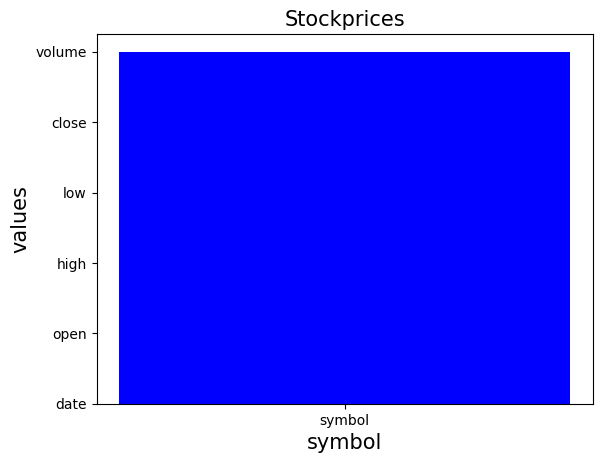

In [12]:
import matplotlib.pyplot as plt
x = ['symbol',]
y = ['date','open','high','low','close','volume']
plt.xlabel("symbol",fontsize=15)
plt.ylabel("values",fontsize=15)
plt.title("Stockprices",fontsize=15)
c=["b",]
plt.bar(x,y,width = 0.2, color = c)
plt.show()

ValueError: could not convert string to float: 'symbol'

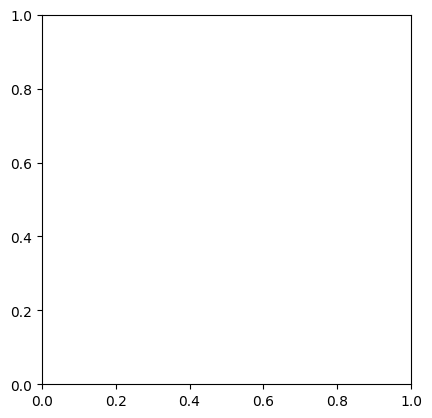

In [13]:
import matplotlib.pyplot as plt
x = ['symbol',]
y = ['date','open','high','low','close','volume']
plt.pie(x,labels=y)

plt.show()


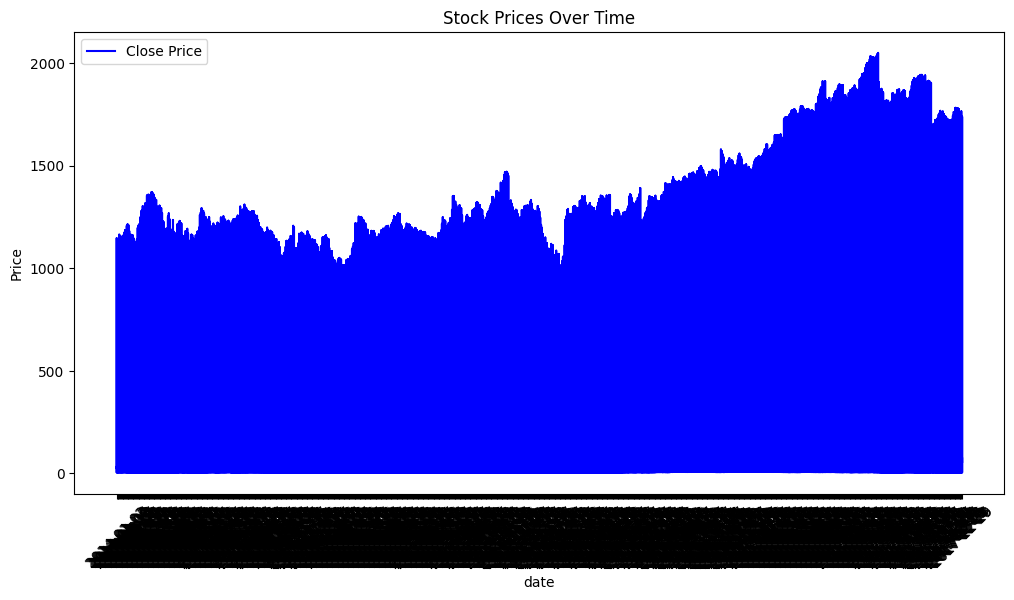

In [15]:
import pandas as pd
import matplotlib.pyplot as plt   # ✅ Import this

# Load CSV
data = pd.read_csv(r"C:/Users/dalib/Documents/2) Stock Prices Data Set.csv")

# Example: line chart for Close price
plt.figure(figsize=(12,6))
plt.plot(data['date'], data['close'], label='Close Price', color='blue')
plt.title("Stock Prices Over Time")
plt.xlabel("date")
plt.ylabel("Price")
plt.legend()
plt.xticks(rotation=45)
plt.show()


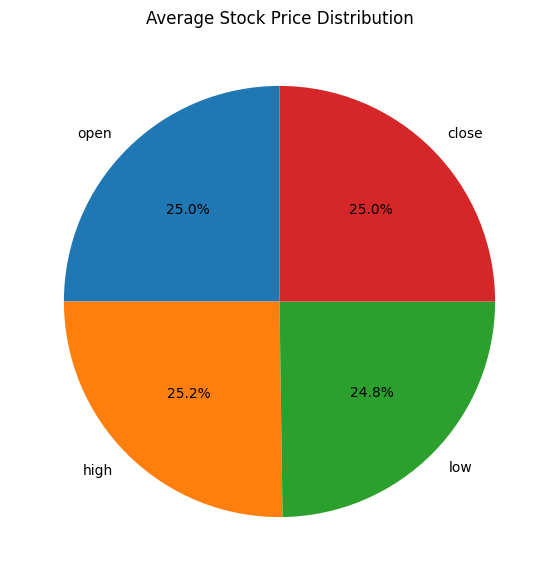

In [16]:
avg_prices = [
    data['open'].mean(),
    data['high'].mean(),
    data['low'].mean(),
    data['close'].mean()

]
labels = ['open', 'high', 'low', 'close']

plt.figure(figsize=(7,7))
plt.pie(avg_prices, labels=labels, autopct='%1.1f%%', startangle=90)
plt.title("Average Stock Price Distribution")
plt.show()


In [ ]:
plt.figure(figsize=(12,6))
plt.bar(data['date'], data['volume'], color='green')
plt.title("Trading Volume Over Time")
plt.xlabel("Date")
plt.ylabel("Volume")
plt.xticks(rotation=45)
plt.show()


In [ ]:
plt.figure(figsize=(12,6))
plt.plot(data['date'], data['close'], label='Close Price', color='blue')
plt.plot(data['date'], data['open'], label='Open Price', color='orange')
plt.title("Stock Prices Over Time")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()
plt.xticks(rotation=45)
plt.show()


In [ ]:
import re
import pandas as pd
import matplotlib.pyplot as plt

# Load your file
data = pd.read_csv(r"C:/Users/dalib/Documents/2) Stock Prices Data Set.csv")

# 1) Normalize column names: strip spaces, lower, replace non-alphanumerics with underscores
def norm(s): 
    return re.sub(r'[^a-z0-9]+', '_', s.strip().lower())
data.columns = [norm(c) for c in data.columns]

# 2) Helper to find a column by intent (case/space-insensitive + synonyms/partials)
def find_col(candidates):
    cand = [norm(c) for c in candidates] if isinstance(candidates, (list, tuple)) else [norm(candidates)]
    # exact match first
    for want in cand:
        for col in data.columns:
            if col == want:
                return col
    # partial match fallback
    for want in cand:
        for col in data.columns:
            if want in col:
                return col
    raise KeyError(f"None of {candidates} found. Available: {list(data.columns)}")

# 3) Locate likely columns (add more synonyms if needed)
date_col  = find_col(['date', 'trade_date', 'timestamp', 'datetime'])
open_col  = find_col(['open', 'open_price', 'opening_price'])
close_col = find_col(['close', 'close_price', 'closing_price', 'adj_close'])
vol_col   = find_col(['volume', 'vol', 'trading_volume'])

print("Using columns ->", {"date": date_col, "open": open_col, "close": close_col, "volume": vol_col})

# 4) Parse dates (safe even if already datetime)
data[date_col] = pd.to_datetime(data[date_col], errors='coerce')

# Example plots that won't break if names differ
plt.figure(figsize=(10,5))
plt.plot(data[date_col], data[open_col], label='Open')
plt.plot(data[date_col], data[close_col], label='Close')
plt.title("Open vs Close Over Time")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Volume bar chart
plt.figure(figsize=(10,4))
plt.bar(data[date_col], data[vol_col])
plt.title("Trading Volume")
plt.xlabel("Date")
plt.ylabel("Volume")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [ ]:
plt.figure(figsize=(10,4))
plt.bar(data[date_col], data[vol_col])
plt.title("Trading Volume"
         )
plt.xlabel("Date")
plt.ylabel("Volume")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [ ]:

plt.figure(figsize=(14,6))
plt.plot(data['date'], data['close'], label="Close Price", color="blue")
plt.title("Stock Closing Price Over Time", fontsize=14)
plt.xlabel("Date")
plt.ylabel("Close Price")
plt.legend()
plt.show()


In [ ]:

plt.figure(figsize=(14,6))
plt.bar(data['date'], data['volume'], color="orange")
plt.title("Trading Volume Over Time", fontsize=14)
plt.xlabel("Date")
plt.ylabel("Volume")
plt.show()


In [ ]:

import plotly.graph_objects as go

fig = go.Figure(data=[go.Candlestick(x=data['date'],
                open=data['open'], high=data['high'],
                low=data['low'], close=data['close'])])
fig.update_layout(title="Candlestick Chart", xaxis_rangeslider_visible=False)
fig.show()


In [ ]:

data['Daily Return'] = data['close'].pct_change()

plt.figure(figsize=(10,5))
sns.histplot(data['Daily Return'].dropna(), bins=100, kde=True, color='purple')
plt.title("Distribution of Daily Returns")
plt.xlabel("Daily Return")
plt.ylabel("Frequency")
plt.show()

print("\nAverage Daily Return:", data['Daily Return'].mean())
print("Volatility (std dev):", data['Daily Return'].std())


In [ ]:

data['MA20'] = data['close'].rolling(20).mean()
data['MA50'] = data['close'].rolling(50).mean()

plt.figure(figsize=(14,6))
plt.plot(data['date'], data['close'], label="Close Price", alpha=0.5)
plt.plot(data['date'], data['MA20'], label="20-Day MA", color="red")
plt.plot(data['date'], data['MA50'], label="50-Day MA", color="green")
plt.title("Stock Price with Moving Averages")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()
plt.show()
